# Relative correlation length
It is sometimes desivable to have a correlation length that is not uniform in space.      
In this notebook we explain how to derive a relative correlation length based on the topography gradients.

In [1]:
using DIVAnd
using PyPlot
using Statistics

In [2]:
dx = dy = 0.1
lonr = 2.5:dx:12.
latr = 42.3:dy:44.6

42.3:0.1:44.6

Download bathymetry if necessary

In [3]:
# https://dox.ulg.ac.be/index.php/s/RSwm4HPHImdZoQP/download  gebco_30sec_4.nc
# https://dox.ulg.ac.be/index.php/s/wS6Y8P8NhIF60eG/download  gebco_30sec_8.nc
# https://dox.ulg.ac.be/index.php/s/U0pqyXhcQrXjEUX/download  gebco_30sec_16.nc

bathname = "../data/gebco_30sec_4.nc"

if !isfile(bathname)
    download("https://dox.ulg.ac.be/index.php/s/RSwm4HPHImdZoQP/download",bathname)
else
    @info("Bathymetry file already downloaded")
end
bathisglobal = true;

┌ Info: Bathymetry file already downloaded
└ @ Main In[3]:10


Read bathymetry and create mask

In [4]:
bx,by,b = DIVAnd.load_bath(bathname,true,lonr,latr)
mask = b .< 0
b[b .< 0] .= 0;

Simple plot to show the mask

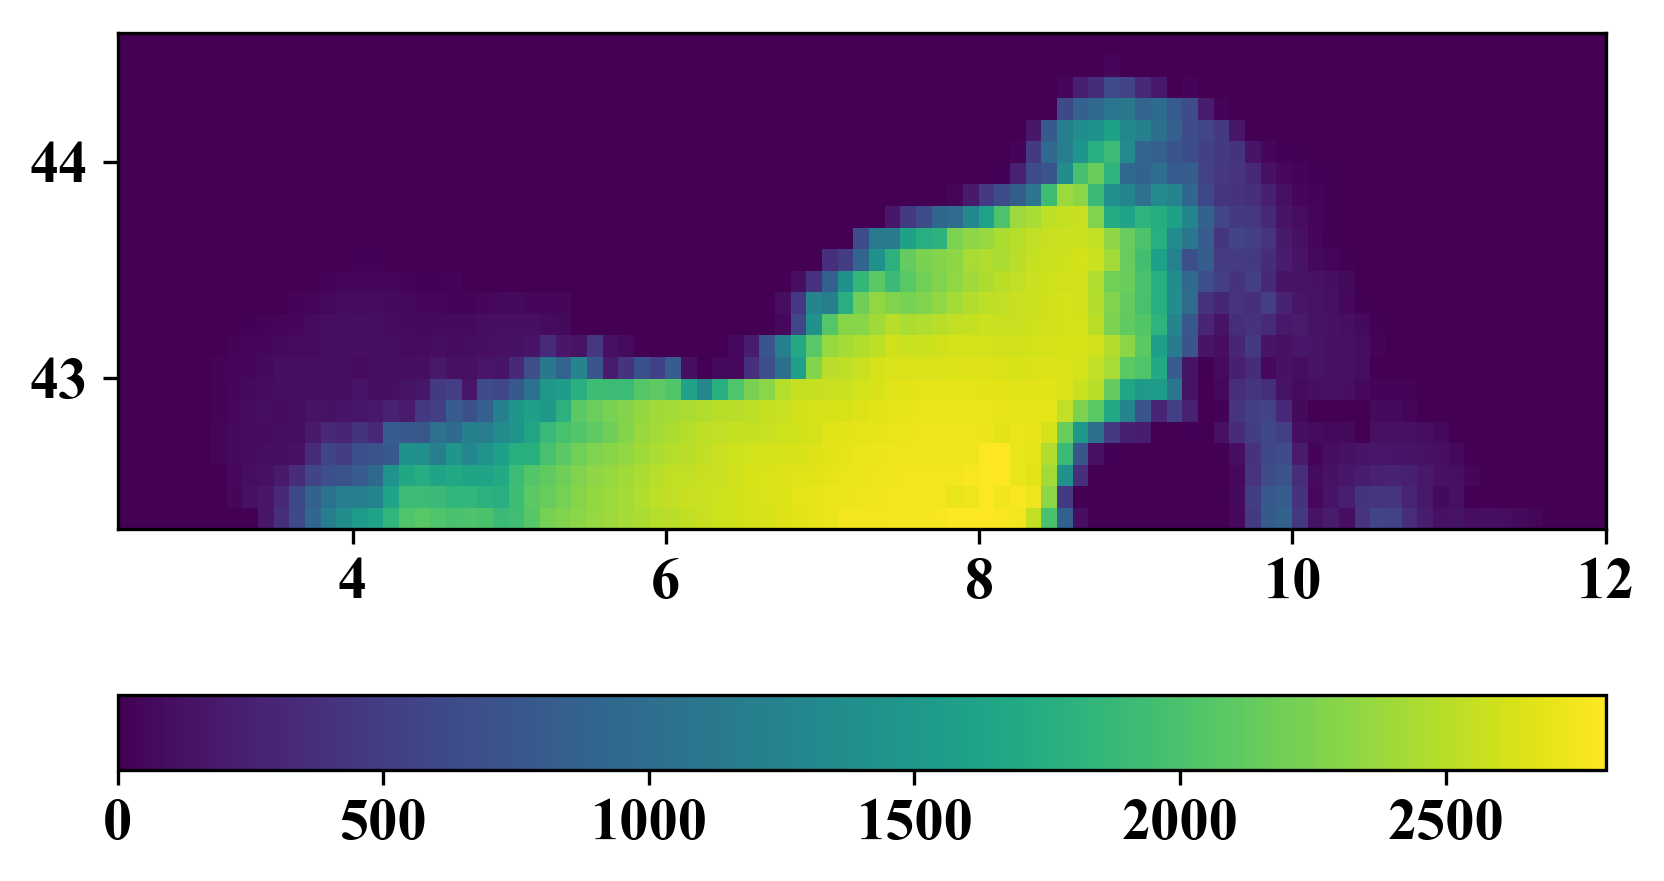

PyObject <matplotlib.colorbar.Colorbar object at 0x7f51565251d0>

In [5]:
pcolor(bx,by,permutedims(b, [2,1]));  
aspectratio = 1/cos(mean([ylim()...]) * pi/180)
gca().set_aspect(aspectratio)
colorbar(orientation="horizontal")

## Analysis
### Parameter setting
Prepare the grid and the metrics

In [6]:
x,y = DIVAnd.ndgrid(bx,by);
pm,pn = DIVAnd.DIVAnd_metric(x,y);

Set the overal correlation length $L$ and compute the relative correlation length over the domain, based on the topography gradient.

In [7]:
L = 10_000 # meters
RL = DIVAnd.lengraddepth((pm,pn),b, L);

The following figure show that the correlation length is lower near the coast, where the strongest gradients appear.

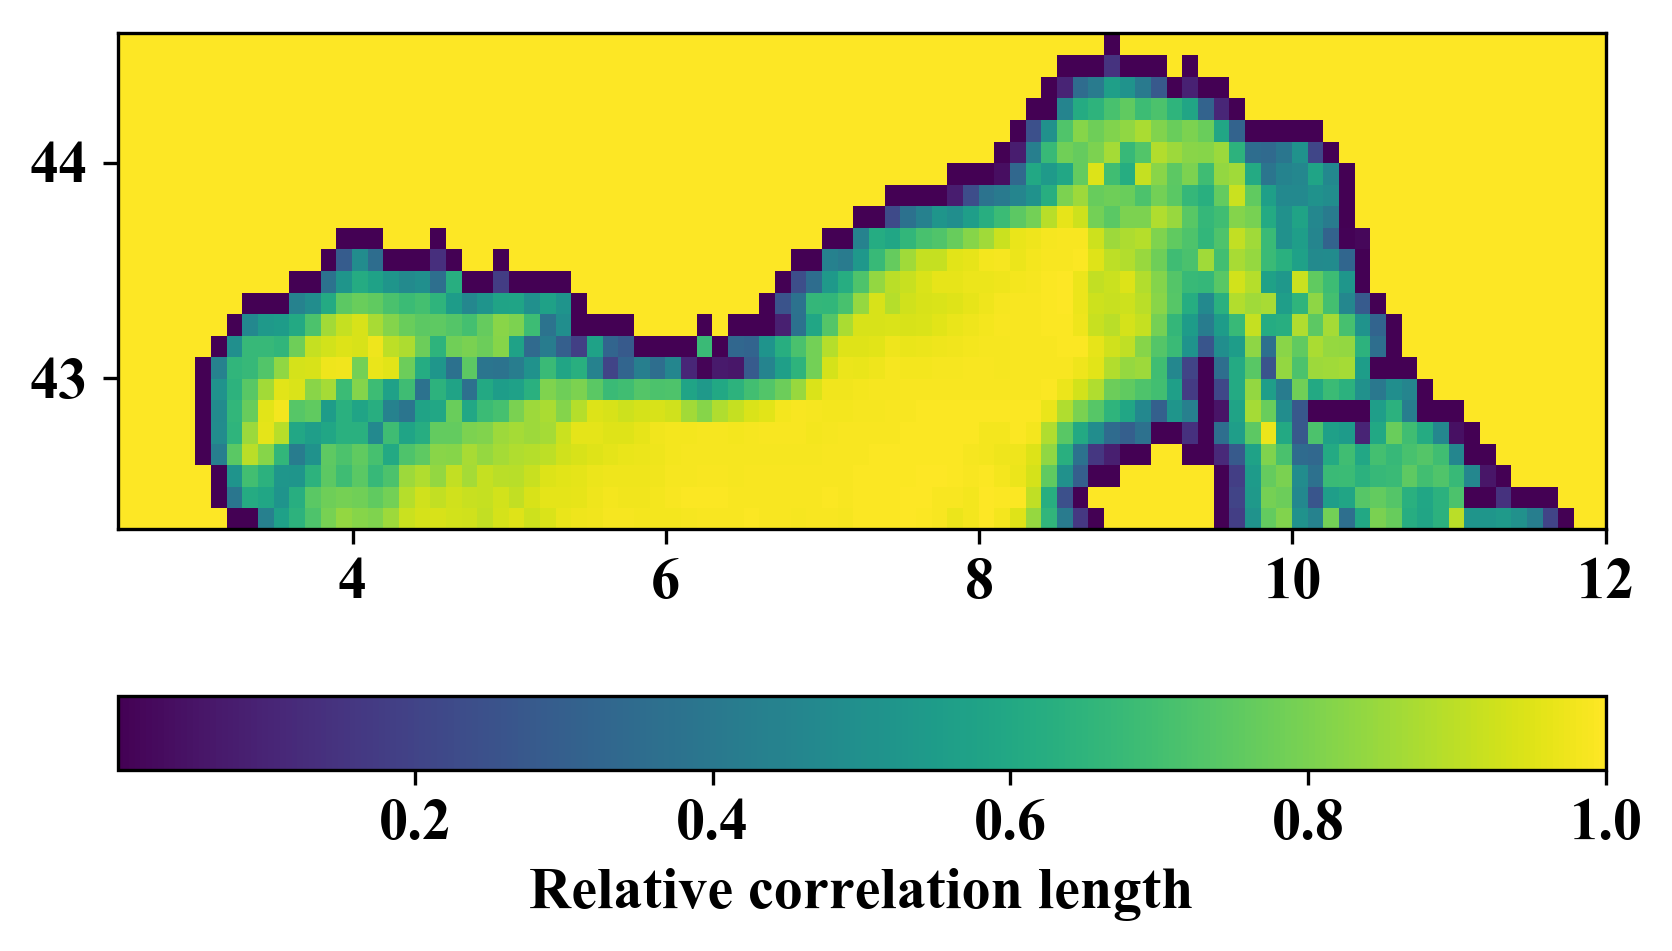

In [8]:
pcolor(bx,by,permutedims(RL, [2,1])); 
gca().set_aspect(aspectratio)
cb = colorbar(orientation="horizontal")
cb.set_label("Relative correlation length")

The RL field is repeated for the different depth levels.

In [9]:
depthr = [0., 10., 20.]
length(depthr)
RL3D = repeat(RL, inner=(1,1,length(depthr)))
@show size(RL3D)

size(RL3D) = (96, 24, 3)


(96, 24, 3)

Parameter `len` for diva3d is then:

In [10]:
len = (RL3D,RL3D,RL3D);

* If the option `fitcorrlen` is true, internally `diva3d` will multiply the relative correlation length with the result of `fithorzcorr` and `fithvertcorr`. 
* If fitting is not activated you have to multiply yourself the relative length scales by appropriate values.